In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv', names=['Comment', 'Label'],header=1)
data.dropna(how='any', inplace=True)
data


,Comment,Label
0,sir g ki value positive hogi,doubt
1,like the video guyssss,irrelevant
2,ummm sir i want see ur wife,irrelevant
3,physics wallah punabi mundamundi mein thusde d...,irrelevant
4,bhupesh,irrelevant
...,...,...
213741,superb performance sir,feedback
213742,mja aaya,feedback
213743,blocks wala sum be padao,feedback
213744,uminima stable umaxima unstable,feedback


In [3]:
# Data Preprocessing
data['Comment'] = data['Comment'].str.lower()

In [4]:

tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(data['Comment'])
y = data['Label'].map({'doubt': 0, 'irrelevant': 1, 'feedback': 2})  # Label encoding

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
l=[]
for i in range(1,50):
    model = LogisticRegression(max_iter=i)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    l.append(f1)
    # print(classification_report(y_test, y_pred, target_names=['doubt', 'irrelevant', 'feedback'])['f1-score'])



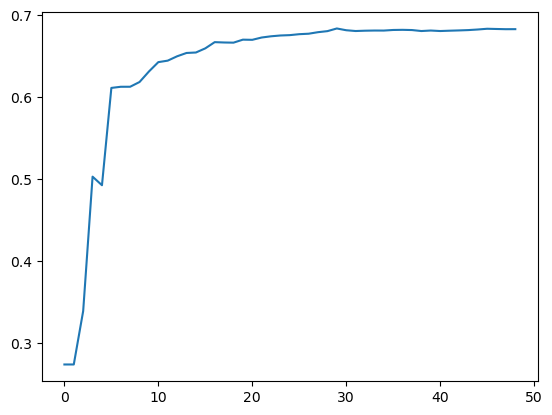

In [42]:
plt.plot(l)

In [44]:
model = LogisticRegression(max_iter=30)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
#l.append(f1)
print(classification_report(y_test, y_pred, target_names=['doubt', 'irrelevant', 'feedback']))

              precision    recall  f1-score   support

       doubt       0.70      0.66      0.68     11076
  irrelevant       0.66      0.63      0.64     12676
    feedback       0.69      0.73      0.71     18998

    accuracy                           0.68     42750
   macro avg       0.68      0.67      0.68     42750
weighted avg       0.68      0.68      0.68     42750



/home/ayushkarn/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['doubt', 'irrelevant', 'feedback']))

              precision    recall  f1-score   support

       doubt       0.71      0.61      0.65     11076
  irrelevant       0.75      0.41      0.53     12676
    feedback       0.60      0.84      0.70     18998

    accuracy                           0.65     42750
   macro avg       0.69      0.62      0.63     42750
weighted avg       0.67      0.65      0.64     42750



In [19]:
model3=DecisionTreeClassifier()
model3.get_depth
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['doubt', 'irrelevant', 'feedback']))

              precision    recall  f1-score   support

       doubt       0.58      0.55      0.57     11076
  irrelevant       0.55      0.54      0.55     12676
    feedback       0.62      0.65      0.63     18998

    accuracy                           0.59     42750
   macro avg       0.59      0.58      0.58     42750
weighted avg       0.59      0.59      0.59     42750



In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Preprocessing and TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(data['Comment'])

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Cluster Assignments
clusters = kmeans.labels_

# Evaluate with Silhouette Score
score = silhouette_score(X, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.003051313487506994
